# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kausar Meutuwah
- **Email:** kausar.meutuwah@gmail.com
- **ID Dicoding:** kausarme

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola perilaku penggunaan sepeda antara pengguna terdaftar dan pengguna kasual berdasarkan hari kerja, akhir pekan, dan hari libur?
2. Bagaimana kondisi cuaca (weathersit) mempengaruhi jumlah penggunaan sepeda baik untuk pengguna terdaftar maupun pengguna kasual?
3. Bagaimana tren penggunaan rental sepeda berdasarkan waktu berdasarkan hari kerja, akhir pekan, dan hari libur serta jenis pengguna?

## Import Semua Packages/Library yang Digunakan

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Disini kita akan memulai dengan membuka file dataset yang bersangkutan menggunakan pandas.

In [22]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

### Assessing Data

In [23]:
day_df.head(), hour_df.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

Data terlihat sudah cukup rapi. Namun, kita akan memastikan tidak terdapat nilai yang hilang, duplikat, atau tidak valid.

In [24]:
# Assessing data untuk missing values, duplicates, dan nilai yang tidak valid

# Untuk day.csv
day_missing_data = day_df.isnull().sum()
day_duplicate_data = day_df.duplicated().sum()
day_describe = day_df.describe()

# Untuk hour.csv
hour_missing_data = hour_df.isnull().sum()
hour_duplicate_data = hour_df.duplicated().sum()
hour_describe = hour_df.describe()

(day_missing_data, day_duplicate_data, day_describe, hour_missing_data, hour_duplicate_data, hour_describe)

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 0,
           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
 75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    731.000000    4.000000    1.000000   12.00000

Selanjutnya kita akan mengecek keberadaan outlier menggunakan boxplot.

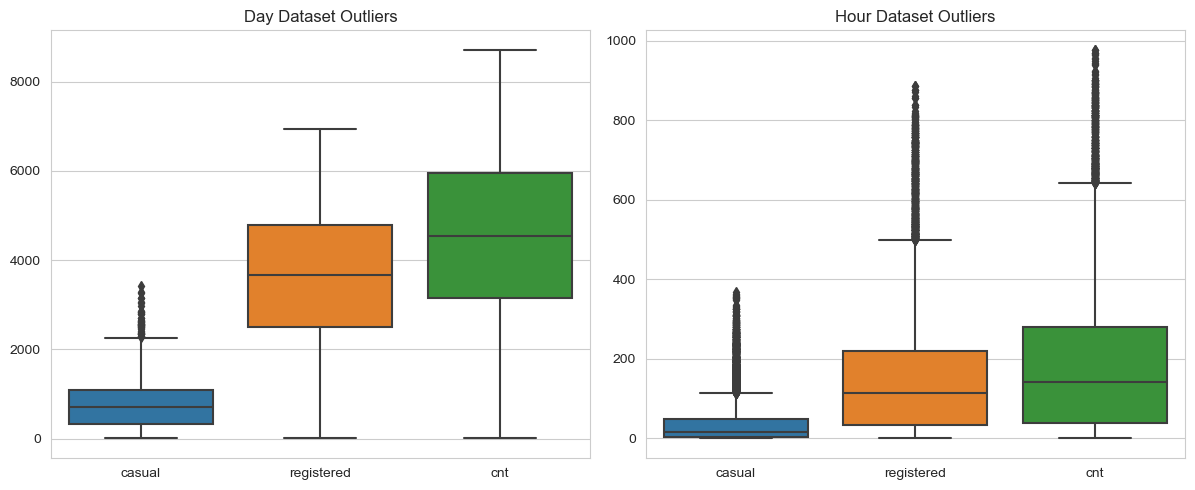

In [25]:
plt.figure(figsize=(18, 5))

# day dataset
plt.subplot(1, 3, 1)
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']])
plt.title('Day Dataset Outliers')

# hour dataset
plt.subplot(1, 3, 2)
sns.boxplot(data=hour_df[['casual', 'registered', 'cnt']])
plt.title('Hour Dataset Outliers')

plt.tight_layout()
plt.show()

Mengingat bahwa kita mengecek data rental sepeda yang berdasarkan sangat berfluktuasi serta analisis yang kita lakukan memang mencari pola unik pada dataset yang cenderung berada pada outlier. Oleh sebab itu, kita akan mempertahankan outlier tersebut karena mereka mungkin mewakili hari-hari atau jam dengan kegiatan khusus atau kondisi cuaca yang ekstrem, yang dapat memberikan wawasan penting.

### Cleaning Data

Karena kita telah melihat bahwa data sudah valid, tidak ada data duplikat serta missing values, maka kita tidak ada tahapan cleaning yang diperlukan lebih lanjut.

## Explanatory Data Analysis & Visualization

### Pertanyaan 1:
Bagaimana pola perilaku penggunaan sepeda antara pengguna terdaftar dan pengguna kasual berdasarkan hari kerja, akhir pekan, dan hari libur?

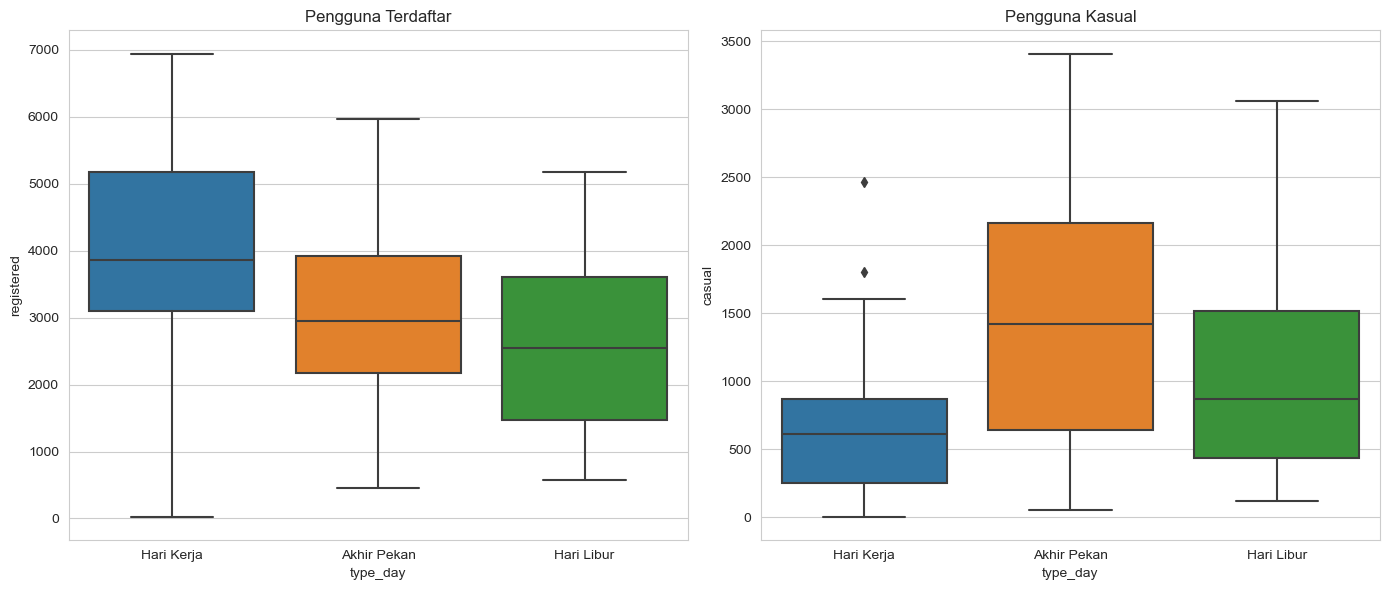

In [26]:
# Menambahkan kolom 'type_day' untuk mengkategorikan hari kerja, akhir pekan, dan hari libur
day_df['type_day'] = 'Hari Kerja'
day_df.loc[day_df['holiday'] == 1, 'type_day'] = 'Hari Libur'
day_df.loc[(day_df['weekday'] == 0) | (day_df['weekday'] == 6), 'type_day'] = 'Akhir Pekan'

# Visualisasi penggunaan sepeda antara pengguna terdaftar dan pengguna kasual
plt.figure(figsize=(14, 6))

# Pengguna Terdaftar
plt.subplot(1, 2, 1)
sns.boxplot(data=day_df, x='type_day', y='registered', order=["Hari Kerja", "Akhir Pekan", "Hari Libur"])
plt.title('Pengguna Terdaftar')

# Pengguna Kasual
plt.subplot(1, 2, 2)
sns.boxplot(data=day_df, x='type_day', y='casual', order=["Hari Kerja", "Akhir Pekan", "Hari Libur"])
plt.title('Pengguna Kasual')

plt.tight_layout()
plt.show()

Dari visualisasi berikut, kita dapat melihat pola penggunaan sepeda antara pengguna terdaftar dan pengguna kasual berdasarkan hari kerja, akhir pekan, dan hari libur

Pengguna Terdaftar: Penggunaan sepeda oleh pengguna terdaftar cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan dan hari libur. Ini diduga disebabkan akibat banyak pengguna terdaftar menggunakan sepeda untuk keperluan komuter sehari-hari, seperti pergi ke tempat kerja atau sekolah.

Pengguna Kasual: Sebaliknya, penggunaan sepeda oleh pengguna kasual meningkat pada akhir pekan dan sedikit lebih tinggi selama hari libur dibandingkan dengan hari kerja. Hal ini diduga akibat pengguna kasual lebih cenderung menggunakan sepeda untuk rekreasi atau kegiatan non-komuter.

### Pertanyaan 2:

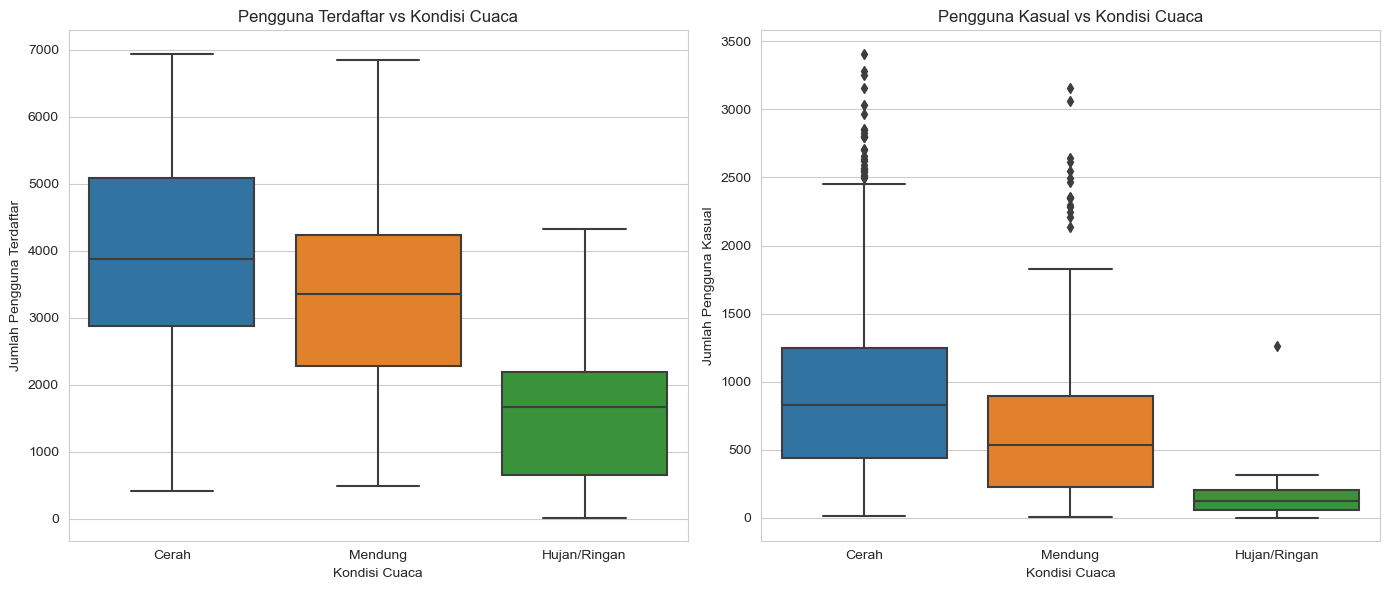

In [27]:
plt.figure(figsize=(14, 6))

# Pengguna Terdaftar berdasarkan kondisi cuaca
plt.subplot(1, 2, 1)
sns.boxplot(data=day_df, x='weathersit', y='registered')
plt.title('Pengguna Terdaftar vs Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Mendung', 'Hujan/Ringan'])

# Pengguna Kasual berdasarkan kondisi cuaca
plt.subplot(1, 2, 2)
sns.boxplot(data=day_df, x='weathersit', y='casual')
plt.title('Pengguna Kasual vs Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Kasual')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Mendung', 'Hujan/Ringan'])

plt.tight_layout()
plt.show()

Dari visualisasi di atas, kita dapat melihat pengaruh kondisi cuaca pada jumlah penggunaan sepeda baik untuk pengguna terdaftar maupun pengguna kasual:

Pengguna Terdaftar: Jumlah pengguna terdaftar cenderung lebih tinggi pada kondisi cuaca cerah dibandingkan dengan kondisi mendung atau hujan/ringan. Meskipun masih ada penggunaan sepeda selama kondisi cuaca kurang ideal, jumlahnya menurun secara signifikan ketika cuaca berubah menjadi hujan atau ringan.

Pengguna Kasual: Pola serupa diamati untuk pengguna kasual, dengan jumlah penggunaan sepeda yang paling tinggi selama cuaca cerah. Penggunaan sepeda oleh pengguna kasual menurun tajam pada kondisi cuaca yang kurang ideal, seperti mendung atau hujan/ringan.

### Pertanyaan 3:

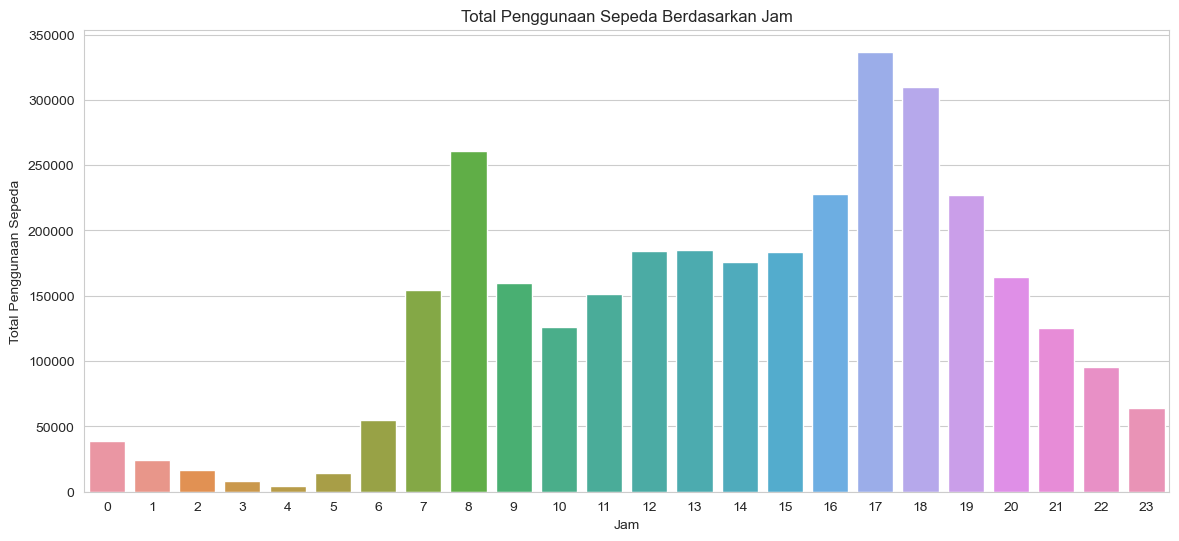

,dteday,hr,cnt
14773,2012-09-12,18,977


In [28]:
# Mencari waktu dan tanggal dengan jumlah pengguna terbanyak
top_usage_hour = hour_df.sort_values(by='cnt', ascending=False).head(1)

# Visualisasi jumlah pengguna berdasarkan jam
plt.figure(figsize=(14, 6))

# Jumlah pengguna per jam
sns.barplot(data=hour_df, x='hr', y='cnt', estimator=sum, errorbar=None)
plt.title('Total Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penggunaan Sepeda')

plt.show()

top_usage_hour[['dteday', 'hr', 'cnt']]

Dari visualisasi total penggunaan sepeda berdasarkan jam, kita dapat melihat bahwa penggunaan sepeda mencapai puncaknya selama jam-jam sibuk di pagi dan sore hari, khususnya sekitar jam 7-9 pagi dan 5-6 sore. Hal tersebut kemungkinan besar diakibatkan oleh jam kerja dan sekolah yang sering digunakan yakni jam pergi kerja/sekolah pada jam 7-9 pagi dan jam pulang pada 5-6 sore.

## Conclusion

Kesimpulan dari EDA dan visualisasi yang telah dilakukan adalah sebagai berikut:

1. Pola Perilaku Penggunaan Sepeda:
- Pengguna terdaftar lebih aktif menggunakan sepeda pada hari kerja, menunjukkan penggunaan sepeda untuk keperluan komuter.
- Pengguna kasual lebih aktif pada akhir pekan dan hari libur, menunjukkan penggunaan sepeda untuk rekreasi atau kegiatan non-komuter.

2. Pengaruh Kondisi Cuaca pada Penggunaan Sepeda:
- Kondisi cuaca cerah meningkatkan jumlah penggunaan sepeda baik untuk pengguna terdaftar maupun kasual.
- Cuaca mendung atau hujan/ringan mengurangi jumlah penggunaan sepeda secara signifikan.

3. Waktu dan Tanggal dengan Penggunaan Sepeda Terbanyak:
- Jam-jam sibuk di pagi (sekitar jam 8) dan sore (sekitar jam 5-6) adalah waktu puncak penggunaan sepeda.


Sumber Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

Referensi Dataset:
[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.
